In [1]:
import keras


Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.preprocessing import image
from keras.layers import BatchNormalization

In [3]:
from keras import backend as K

In [8]:
train_data=os.getcwd()+'\\training_set'
test_data=os.getcwd()+'\\test_set'
img_width,img_height=128,128
train_data_dir=train_data
test_data_dir=test_data
epochs=10
# nb_train_samples=8000
# nb_validation_sample=2000
batch_size=32

In [7]:
import os

In [ ]:
train_data

In [9]:
if K.image_data_format()=='channels_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')


test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
classifier = Sequential()
classifier.add(Convolution2D(32 ,kernel_size=(3,3), input_shape=input_shape,activation="relu"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Convolution2D(64 ,kernel_size=(3,3),activation="relu"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Convolution2D(128 ,kernel_size=(3,3),activation="relu"))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Flatten())
classifier.add(Dense(256,activation="relu"))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(1, activation='sigmoid'))


In [14]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [15]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [16]:
from IPython.display import display 
from PIL import Image
model=classifier.fit_generator(
    train_generator, 
    steps_per_epoch=8000,
    epochs=epochs,  
    validation_data=test_generator,
    validation_steps=2000
)

Epoch 1/10
8000/8000 [==============================] - 2211s 276ms/step - loss: 0.4551 - accuracy: 0.7937 - val_loss: 0.3665 - val_accuracy: 0.8586
Epoch 2/10
8000/8000 [==============================] - 1281s 160ms/step - loss: 0.2353 - accuracy: 0.9019 - val_loss: 1.2479 - val_accuracy: 0.8941
Epoch 3/10
8000/8000 [==============================] - 1271s 159ms/step - loss: 0.1709 - accuracy: 0.9328 - val_loss: 0.6839 - val_accuracy: 0.8846
Epoch 4/10
8000/8000 [==============================] - 1287s 161ms/step - loss: 0.1379 - accuracy: 0.9475 - val_loss: 0.4149 - val_accuracy: 0.8980
Epoch 5/10
8000/8000 [==============================] - 2779s 347ms/step - loss: 0.1183 - accuracy: 0.9558 - val_loss: 0.2967 - val_accuracy: 0.8992
Epoch 6/10
8000/8000 [==============================] - 1414s 177ms/step - loss: 0.1062 - accuracy: 0.9611 - val_loss: 0.1901 - val_accuracy: 0.8993
Epoch 7/10
8000/8000 [==============================] - 1313s 164ms/step - loss: 0.0980 - accuracy: 0.9647

In [17]:
import os
os.mkdir('models')
classifier.save('models\model-cat-dog.h5')

In [27]:
classifier.save_weights('models\cat-dog-weigths.h5')

In [20]:
model.history

{'val_loss': [0.36654114723205566,
  1.2478923797607422,
  0.6839188933372498,
  0.41494473814964294,
  0.29672425985336304,
  0.19014474749565125,
  0.9853611588478088,
  0.1421596258878708,
  0.15010273456573486,
  0.316180557012558],
 'val_accuracy': [0.8585600852966309,
  0.8941059708595276,
  0.8845923542976379,
  0.8980064392089844,
  0.8991620540618896,
  0.8992723226547241,
  0.8990833163261414,
  0.9094859957695007,
  0.904517412185669,
  0.9008631706237793],
 'loss': [0.4551265148939565,
  0.23528030342562123,
  0.17087969860865268,
  0.1379377619723382,
  0.11831397981707414,
  0.10616937708349723,
  0.09800902034908904,
  0.08979132126370495,
  0.0855429207332636,
  0.0815986183980076],
 'accuracy': [0.79366404,
  0.901918,
  0.9327734,
  0.94752735,
  0.9557812,
  0.9610664,
  0.96473044,
  0.968375,
  0.9702461,
  0.9717422]}

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Loss---------------Accuracy')

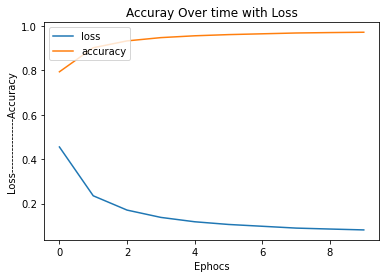

In [35]:
plt.plot(model.history['loss'])
plt.plot(model.history['accuracy'])
plt.legend(['loss','accuracy'],loc='upper left')
plt.title("Accuray Over time with Loss")
plt.xlabel("Ephocs")
plt.ylabel("Loss---------------Accuracy")

Text(0, 0.5, 'validation_loss---------------Accuracy')

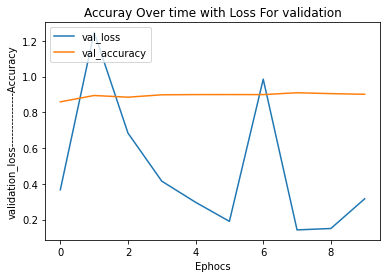

In [36]:
plt.plot(model.history['val_loss'])
plt.plot(model.history['val_accuracy'])
plt.legend(['val_loss','val_accuracy'],loc='upper left')
plt.title("Accuray Over time with Loss For validation")
plt.xlabel("Ephocs")
plt.ylabel("validation_loss---------------Accuracy")

### Lets Predict Image

In [55]:
img_pred=image.load_img(test_data+'/dogs/dog.4007.jpg',target_size=(128,128))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [56]:
img_pred

array([[[[ 95.,  22.,  13.],
         [ 95.,  20.,  14.],
         [ 95.,  16.,  12.],
         ...,
         [132., 135., 106.],
         [124., 124.,  96.],
         [107., 107.,  79.]],

        [[ 86.,  18.,   9.],
         [ 86.,  13.,   6.],
         [ 93.,  14.,   9.],
         ...,
         [109.,  98.,  70.],
         [122., 113.,  84.],
         [111., 104.,  75.]],

        [[ 96.,  33.,  26.],
         [ 91.,  24.,  16.],
         [103.,  26.,  18.],
         ...,
         [144., 125.,  95.],
         [120., 105.,  74.],
         [101.,  90.,  58.]],

        ...,

        [[155., 150., 147.],
         [150., 145., 142.],
         [149., 144., 141.],
         ...,
         [190., 189., 187.],
         [184., 183., 181.],
         [181., 180., 178.]],

        [[152., 147., 144.],
         [144., 139., 136.],
         [157., 152., 149.],
         ...,
         [187., 186., 184.],
         [184., 183., 181.],
         [184., 183., 181.]],

        [[152., 147., 144.],
       

In [57]:
result=classifier.predict(img_pred)
if(result[0][0]==1):
    prediction="dog"
else:
    prediction="cat"
print(prediction)

dog
